In [22]:
import os
import itertools

from tqdm.notebook import trange,tqdm

from tokenizers import Tokenizer
from tokenizers.models import BPE,Unigram
from tokenizers.trainers import BpeTrainer,UnigramTrainer
from tokenizers.pre_tokenizers import Whitespace

import pandas as pd

In [20]:
# !pip install tokenizers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 1.1 MB/s eta 0:00:0000:0100:010m


In [3]:
data = pd.read_csv('./data/input/data.csv')
datas = data['chat'][0]
datas

'hi , how are you doing ? i am getting ready to do some cheetah chasing to stay in shape .\nyou must be very fast . hunting is one of my favorite hobbies .\ni am ! for my hobby i like to do canning or some whittling .\ni also remodel homes when i am not out bow hunting .\nthat is neat . when i was in high school i placed 6th in 100m dash !\nthat is awesome . do you have a favorite season or time of year ?\ni do not . but i do have a favorite meat since that is all i eat exclusively .\nwhat is your favorite meat to eat ?\ni would have to say its prime rib . do you have any favorite foods ?\ni like chicken or macaroni and cheese .\ndo you have anything planned for today ? i think i am going to do some canning .\ni am going to watch football . what are you canning ?\ni think i will can some jam . do you also play footfall for fun ?\nif i have time outside of hunting and remodeling homes . which is not much !\n'

# Version 0.01

In [ ]:
h = {}
words = data.split()
maxLenWord = max(len(i) for i in words)
freq = lambda j,h : h[j]+1 if j in list(h.keys()) else 1
count_substring = lambda main_string, substring: main_string.count(substring)
for i in words:
    for j in i:
        x = freq(j,h)
        h[j] = x
char_list = list(h.keys())


# for i in two_letter_substrings:
#     x=0
#     for j in words:
#         x += count_substring(j,i)
#     if x not in [0,1]: h[i] = x
maxLenWord

In [ ]:
corpus = []
corpus.extend(char_list)
substrings = lambda char_list1,char_list2: [char_list1[i] + char_list2[j] for i in range(len(char_list)) for j in range(len(char_list))]
temp_list = char_list
for i in range(maxLenWord-1):
    temp_list1 = substrings(char_list,temp_list)
    temp_list2 = substrings(temp_list,char_list)
    temp_list = temp_list1+temp_list2
    print(temp_list[0])
    corpus.extend(temp_list)


In [ ]:
for i in range(maxLenWord,1,-1):
    print(i)
    for substring in corpus:
        if len(substring) == i:

            x=0
            for word in words:
                x += count_substring(word,substring)
                
            if x != 0: print(substring)


# Version 0.02

In [ ]:
p =['56']
k=p
k = [4]
k

In [ ]:
corpus = []
corpus.extend(char_list)
substrings = lambda letter,charlist : [''.join(combination) for combination in tqdm(itertools.product(charlist, repeat=letter)) if count_substring(data,''.join(combination)) != 0]
for i in trange(2,maxLenWord+1):
    corpus.extend(substrings(i,char_list))
len(corpus)

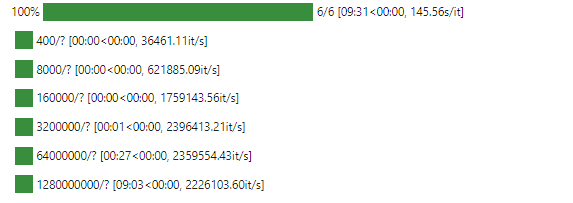

In [ ]:
import pickle
with open('goin.bin','wb') as file:
    pickle.dump(corpus,file)

In [ ]:
print(corpus)

['h', 'i', ',', 'o', 'w', 'a', 'r', 'e', 'y', 'u', 'd', 'n', 'g', '?', 'm', 't', 's', 'c', 'p', '.', 'hi', 'ho', 'ha', 'he', 'in', 'oi', 'ow', 'ou', 'om', 'ah', 'ar', 'ay', 'ad', 'am', 'as', 'ap', 're', 'ea', 'ee', 'et', 'yo', 'do', 'dy', 'ng', 'ge', 'me', 'ti', 'to', 'ta', 'tt', 'sh', 'si', 'so', 'st', 'ch', 'pe', 'how', 'has', 'hap', 'hee', 'ing', 'oin', 'ome', 'are', 'ady', 'asi', 'ape', 'rea', 'ead', 'eet', 'eta', 'ett', 'you', 'doi', 'get', 'tin', 'tah', 'tay', 'tti', 'sha', 'sin', 'som', 'sta', 'cha', 'che', 'hasi', 'hape', 'heet', 'oing', 'asin', 'read', 'eady', 'eeta', 'etah', 'etti', 'doin', 'gett', 'ting', 'ttin', 'shap', 'sing', 'some', 'stay', 'chas', 'chee', 'hasin', 'heeta', 'asing', 'ready', 'eetah', 'ettin', 'doing', 'getti', 'tting', 'shape', 'chasi', 'cheet', 'hasing', 'heetah', 'etting', 'gettin', 'chasin', 'cheeta', 'getting', 'chasing', 'cheetah']

# Version 0.03


In [ ]:
sentence = datas.split('\n')
sentence= list(filter(lambda x: x!='',sentence))
# sentence= list(filter(lambda x: x+='[SEP]',sentence))
for i in range(len(sentence)): sentence[i] += '[SEP]'
for i in range(len(sentence)): sentence[i]= sentence[i].split()
for i in range(len(sentence)):
    for j in range(len(sentence[i])):
        sentence[i][j] += '</w>'


In [18]:
h = {}
count_substring = lambda main_string, substring: main_string.count(substring)
freq = lambda j,h : h[j]+1 if j in list(h.keys()) else 1
for i in range(len(sentence)):
    for j in range(len(sentence[i])):
        for l in sentence[i][j]:
            x = freq(l,h)
            h[l]=x
h

{'h': 41,
 'i': 67,
 '<': 207,
 '/': 207,
 'w': 220,
 '>': 207,
 ',': 1,
 'o': 74,
 'a': 63,
 'r': 22,
 'e': 58,
 'y': 21,
 'u': 19,
 'd': 22,
 'n': 47,
 'g': 18,
 '?': 7,
 'm': 26,
 't': 53,
 's': 33,
 'c': 17,
 'p': 5,
 '.': 15,
 '[': 14,
 'S': 14,
 'E': 14,
 'P': 14,
 ']': 14,
 'b': 9,
 'v': 13,
 'f': 18,
 '!': 3,
 'l': 22,
 'k': 5,
 '6': 1,
 '1': 1,
 '0': 2,
 'x': 1,
 'j': 1}

# Version 0.04 -- Using tonizer by hugging face

In [ ]:
unk_token = "<UNK>"
spl_tokens = ["<UNK>","<SEP>","<CLS>","<MASK>"]

def prepare_tokenizer_trainer(alg='BPE'):
    if alg == 'BPE':
        tokenizer = Tokenizer(BPE(unk_token=unk_token))
        trainer = BpeTrainer(spl_tokens=spl_tokens)
    elif alg == 'UNI':
        tokenizer = Tokenizer(Unigram()))
        trainer = UnigramTrainer(unk_token=unk_token,spl_tokens=spl_tokens)
    tokenizer.pre_tokenizer = Whitespace()
    return tokenizer, trainer
    
def train_tokenizer(files,alg='BPE'):
    tokenizer,trainer = prepare_tokenizer_trainer(alg)
    tokenizer.train(files,trainer)
    tokenizer.save(f'./data/output/token-{alg}.json')
    tokenizer = Tokenizer.from_file(f'./data/output/token-{alg}.json')
    return tokenizer
